In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
list0 = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']

for i in list0:
    df_train[i] = df_train[i].fillna("None")
    df_test[i] = df_test[i].fillna("None")

In [4]:
list1 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea','GarageYrBlt','GarageCars','GarageArea']

for i in list1:
    df_train[i] = df_train[i].fillna(0)
    df_test[i] = df_test[i].fillna(0)

In [5]:
list2 = ['MSZoning','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']

for i in list2:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [6]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [7]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

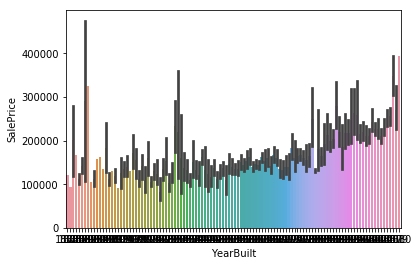

In [9]:
sns.barplot(df_train.YearBuilt,df_train.SalePrice)

In [10]:
df_train['BuiltYear'] = 2018 - df_train['YearBuilt']

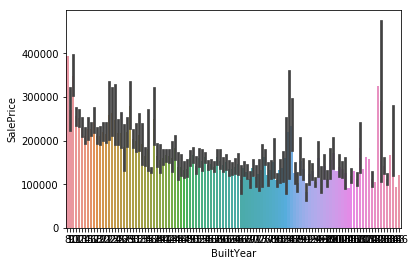

In [11]:
sns.barplot(df_train.BuiltYear,df_train.SalePrice)

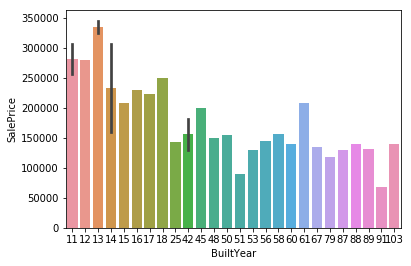

In [12]:
sns.barplot(df_train.BuiltYear[:30],df_train.SalePrice)

In [13]:
df_train['RemodYear'] = 2018 - df_train['YearRemodAdd']

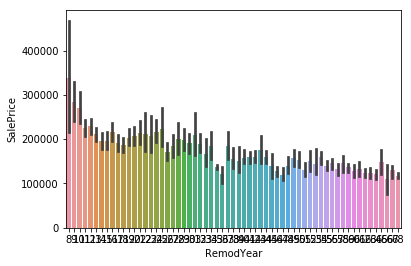

In [14]:
sns.barplot(df_train['RemodYear'],df_train['SalePrice'])

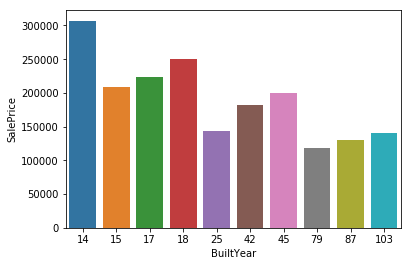

In [15]:
sns.barplot(df_train.BuiltYear[0:10],df_train.SalePrice)

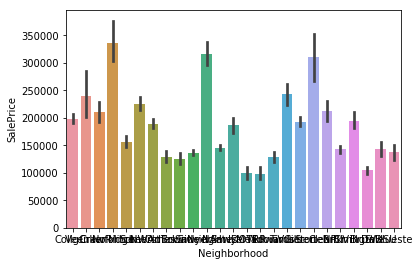

In [16]:
sns.barplot(df_train.Neighborhood,df_train.SalePrice)

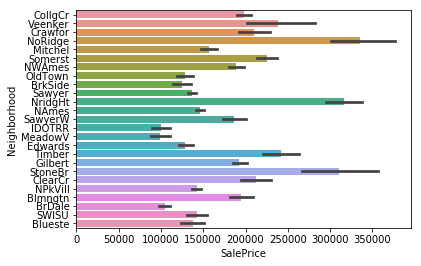

In [17]:
sns.barplot(df_train.SalePrice,df_train.Neighborhood)

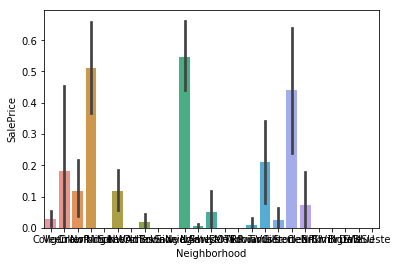

In [18]:
sns.barplot(df_train.Neighborhood,df_train.SalePrice>300000)

In [19]:
pd.Series.value_counts(df_train['Condition2'])

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [20]:
pd.Series.value_counts(df_train['Condition1'])

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

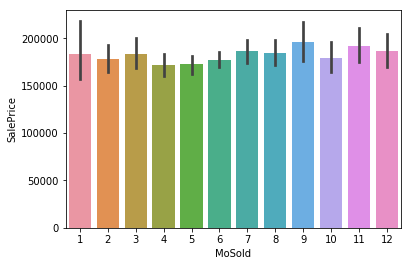

In [21]:
sns.barplot(df_train['MoSold'],df_train['SalePrice'])

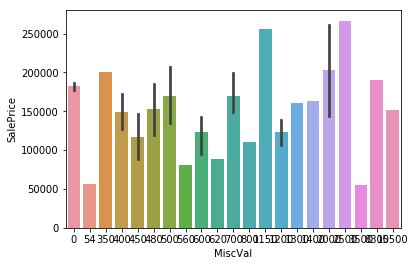

In [22]:
sns.barplot(df_train['MiscVal'],df_train['SalePrice'])

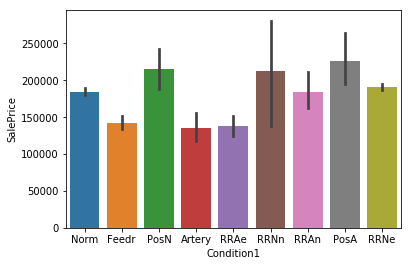

In [23]:
sns.barplot(df_train.Condition1,df_train.SalePrice)
#Norm, RRAn, RRNe / PosN, RRNn, PosA / Feedr, Artery, RRAeでマッピング予定

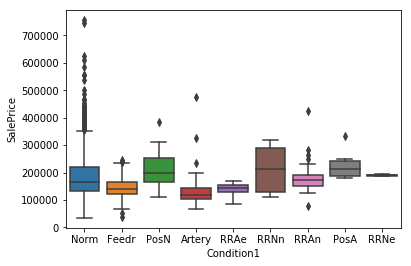

In [24]:
sns.boxplot(df_train.Condition1,df_train.SalePrice)

In [25]:
Con1_mapping = {'PosN':3,'Norm':2,'RRAn':2,'RRNn':4,'PosA':3,'Feedr':1,'Artery':1,'RRAe':1,'RRNe':2}
df_train['Condition1'] = df_train['Condition1'].map(Con1_mapping)

In [26]:
df_train['Condition1'].isnull().sum()[df_train['Condition1'].isnull().sum()>0]

array([], dtype=int64)

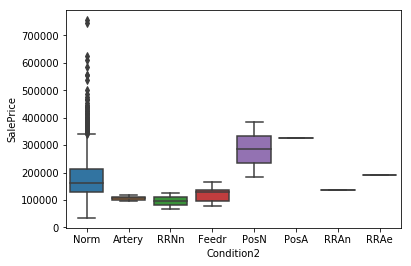

In [27]:
sns.boxplot(df_train.Condition2,df_train.SalePrice)

In [28]:
Con2_mapping = {'PosN':2,'Norm':1,'RRAn':0,'RRNn':0,'PosA':2,'Feedr':0,'Artery':0,'RRAe':1}
df_train['Condition2'] = df_train['Condition2'].map(Con2_mapping)

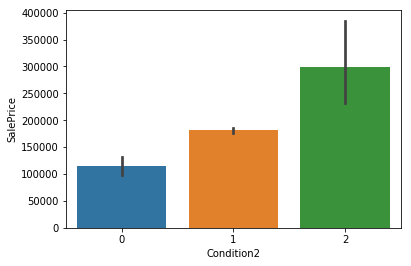

In [29]:
sns.barplot(df_train.Condition2,df_train.SalePrice) 

In [30]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

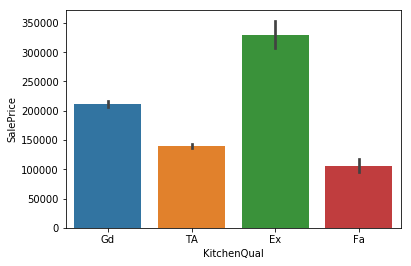

In [31]:
sns.barplot(df_train.KitchenQual,df_train.SalePrice)

In [32]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

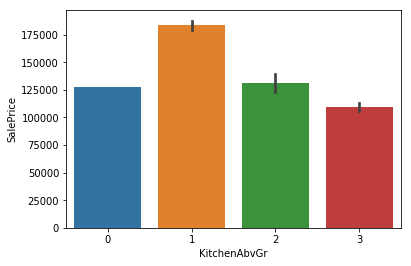

In [33]:
sns.barplot(df_train.KitchenAbvGr,df_train.SalePrice)

In [34]:
df_features = df_train.select_dtypes(include=['object'])

In [35]:
df_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

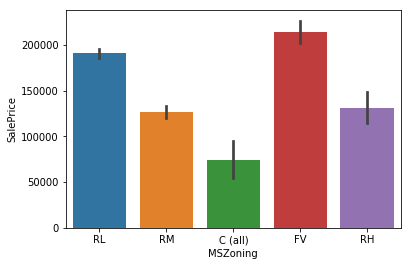

In [36]:
sns.barplot(df_train.MSZoning,df_train.SalePrice)

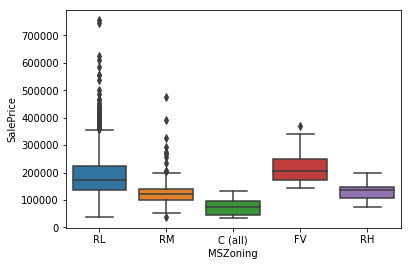

In [37]:
sns.boxplot(x='MSZoning',y='SalePrice',data=df_train)

In [38]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [39]:
pd.Series.value_counts(df_train['MSZoning'])

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [40]:
MSZ_mapping = {'FV':3,'RL':2,'RH':1,'RM':1,'C (all)':0}
df_train['MSZoning'] = df_train['MSZoning'].map(MSZ_mapping)

In [41]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

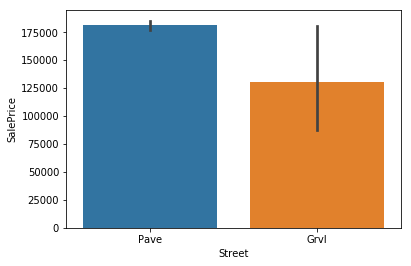

In [42]:
sns.barplot(df_train.Street,df_train.SalePrice) #AlleyとStreetほぼ同じ

In [43]:
Street_mapping = {'Pave':1,'Grvl':0}
df_train['Street'] = df_train['Street'].map(Street_mapping)

In [44]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

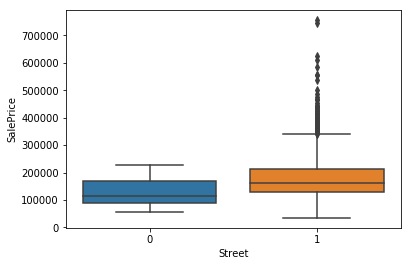

In [45]:
sns.boxplot(x='Street',y='SalePrice',data=df_train)

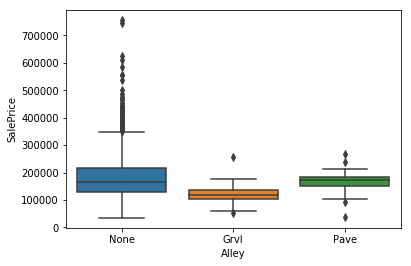

In [46]:
sns.boxplot(df_train.Alley,df_train.SalePrice)

In [47]:
Alley_mapping = {'None':2,'Pave':1,'Grvl':0}
df_train['Alley'] = df_train['Alley'].map(Alley_mapping)

In [48]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

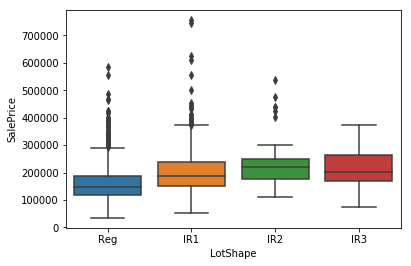

In [49]:
sns.boxplot(df_train.LotShape,df_train.SalePrice)

In [50]:
LotShape_mapping = {'IR3':2,'IR2':2,'IR1':1,'Reg':0}
df_train['LotShape'] = df_train['LotShape'].map(LotShape_mapping)

In [51]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

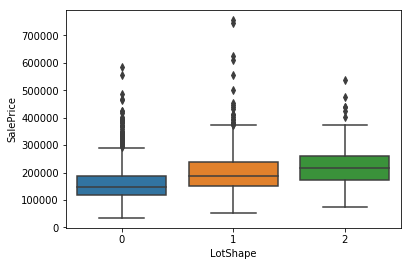

In [52]:
sns.boxplot(x='LotShape',y='SalePrice',data=df_train)

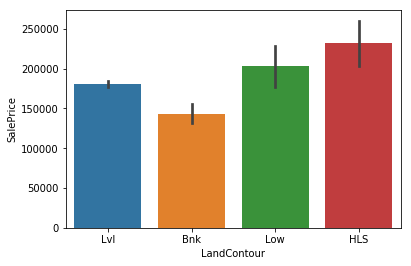

In [53]:
sns.barplot(df_train.LandContour,df_train.SalePrice)#物件の平坦度

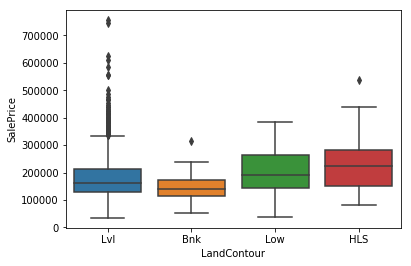

In [54]:
sns.boxplot(x='LandContour',y='SalePrice',data=df_train)

In [55]:
LandCount_mapping = {'HLS':2,'Low':2,'Bnk':1,'Lvl':0}
df_train['LandContour'] = df_train['LandContour'].map(LandCount_mapping)

In [56]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

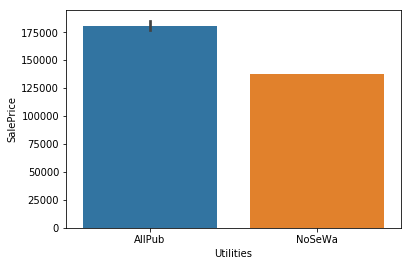

In [57]:
sns.barplot(df_train.Utilities,df_train.SalePrice)#消す

In [58]:
del df_train['Utilities']

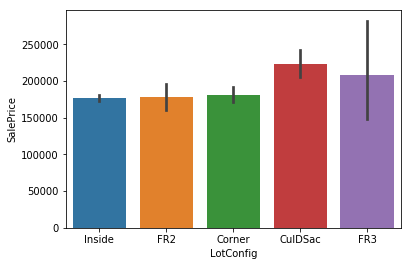

In [59]:
sns.barplot(df_train.LotConfig,df_train.SalePrice)#ロットの構成

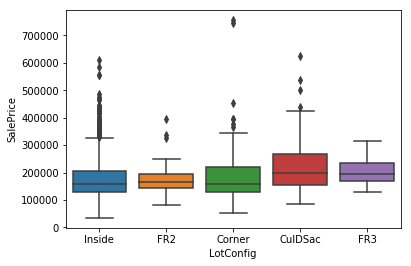

In [60]:
sns.boxplot(x='LotConfig',y='SalePrice',data=df_train)

In [61]:
LotCon_mapping = {'CulDSac':3,'FR3':2,'Corner':2,'FR2':1,'Inside':1}
df_train['LotConfig'] = df_train['LotConfig'].map(LotCon_mapping)

In [62]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

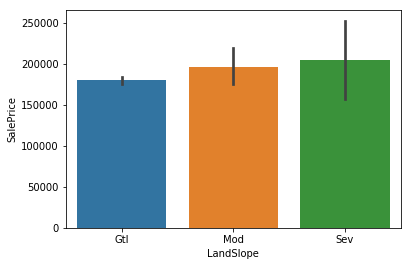

In [63]:
sns.barplot(df_train.LandSlope,df_train.SalePrice) #土地の傾斜　LandContourだけでいいかも

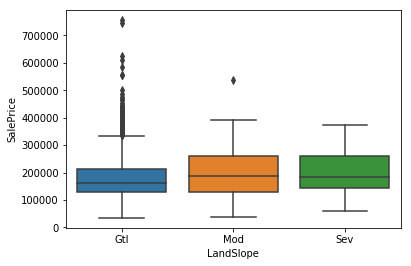

In [64]:
sns.boxplot(x='LandSlope',y='SalePrice',data=df_train)

In [65]:
LandSlope_mapping = {'Mod':1,'Sev':1,'Gtl':0}
df_train['LandSlope'] = df_train['LandSlope'].map(LandSlope_mapping)

In [66]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

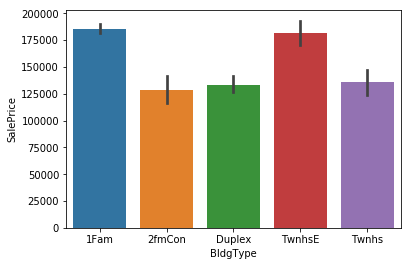

In [67]:
sns.barplot(df_train.BldgType,df_train.SalePrice) 

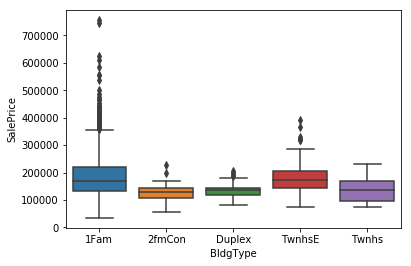

In [68]:
sns.boxplot(x='BldgType',y='SalePrice',data=df_train) #1FamとTwnhsE / 2fmConとDupleとTwnhs

In [69]:
pd.Series.value_counts(df_train['BldgType'])

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [70]:
BldgType_mapping = {'TwnhsE':2,'1Fam':2,'Twnhs':1,'2fmCon':0,'Duplex':0,}
df_train['BldgType'] = df_train['BldgType'].map(BldgType_mapping)

In [71]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

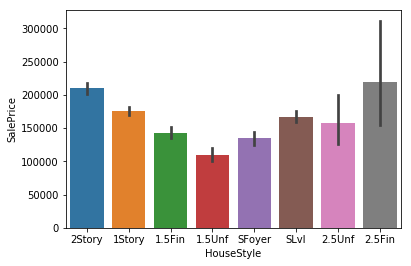

In [72]:
sns.barplot(df_train.HouseStyle,df_train.SalePrice)

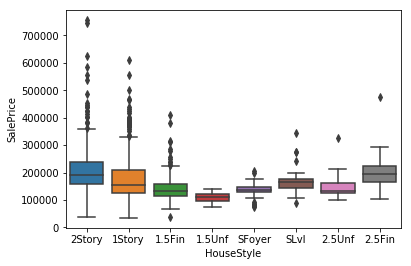

In [73]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=df_train)

In [74]:
HouseStyle_mapping = {'2Story':3,'2.5Fin':3,'1Story':2,'SLvl':2,'1.5Fin':1,'SFoyer':1,'2.5Unf':1,'1.5Unf':0}
df_train['HouseStyle'] = df_train['HouseStyle'].map(HouseStyle_mapping)

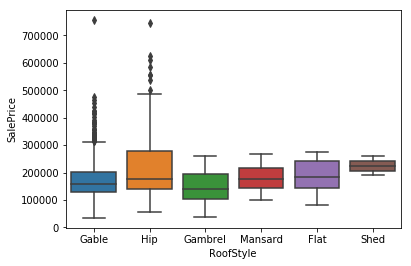

In [75]:
sns.boxplot(x='RoofStyle',y='SalePrice',data=df_train)

In [76]:
RoofStyle_mapping = {'Hip':3,'Shed':2,'Flat':1,'Mansard':1,'Gable':0,'Gambrel':0}
df_train['RoofStyle'] = df_train['RoofStyle'].map(RoofStyle_mapping)

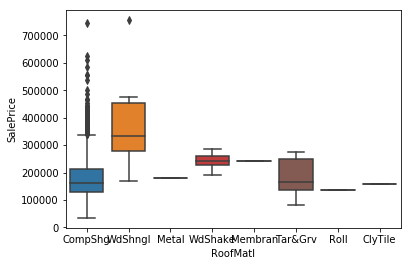

In [77]:
sns.boxplot(x='RoofMatl',y='SalePrice',data=df_train)

In [78]:
pd.Series.value_counts(df_train['RoofMatl'])

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [79]:
RoofM_mapping = {'WdShngl':1,'Metal':0,'WdShake':0,'Membran':0,'Tar&Grv':0,'Roll':0,'ClyTile':0,'CompShg':0}
df_train['RoofMatl'] = df_train['RoofMatl'].map(RoofM_mapping)

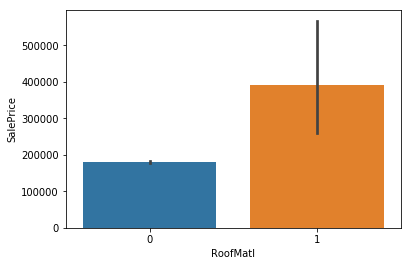

In [80]:
sns.barplot(df_train.RoofMatl,df_train.SalePrice)

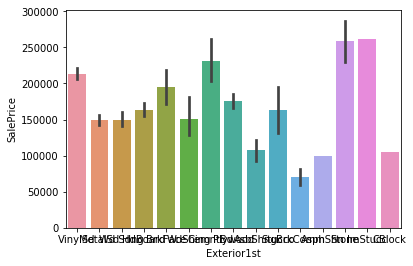

In [81]:
sns.barplot(df_train.Exterior1st,df_train.SalePrice)

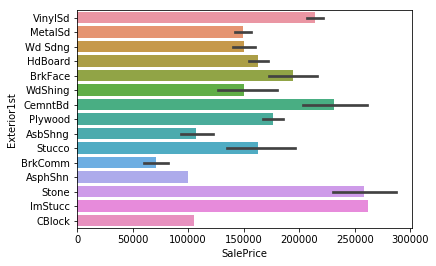

In [82]:
sns.barplot(df_train.SalePrice,df_train.Exterior1st)#Exterior1stはExterior2とほぼ一緒

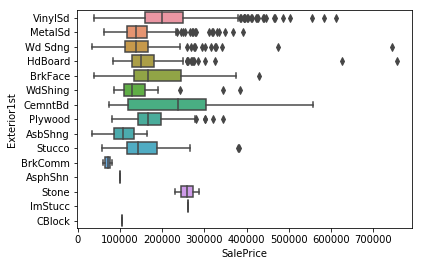

In [83]:
sns.boxplot(df_train.SalePrice,df_train.Exterior1st)

In [84]:
Ex1st_mapping = {'VinylSd':2,'CemntBd':3,'BrkFace':2,'Stone':3,'MetalSd':1,'Wd Sdng':1,'HdBoard':1,'WdShing':1, 'Plywood':1, 'AsbShng':1, 'BrkComm':1, 'Stucco':1, 'AsphShn':1,'ImStucc':3,'CBlock':1}
df_train['Exterior1st'] = df_train['Exterior1st'].map(Ex1st_mapping)

In [85]:
pd.Series.value_counts(df_train['Exterior1st'])

1    831
2    565
3     64
Name: Exterior1st, dtype: int64

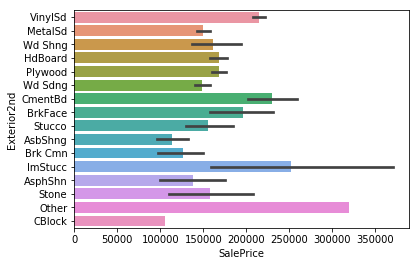

In [86]:
#'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#'SaleType', 'SaleCondition'
sns.barplot(df_train.SalePrice,df_train.Exterior2nd)


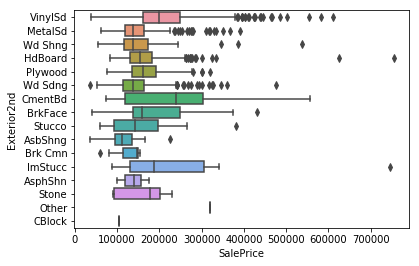

In [87]:
sns.boxplot(df_train.SalePrice,df_train.Exterior2nd) #CmentBdとImStucc/VinylSdとBrkFace/それ以外で数値化したい

In [88]:
pd.Series.value_counts(df_train['Exterior2nd'])

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [89]:
Ex2nd = {'CmentBd':2,'ImStucc':2,'BrkFace':1,'VinylSd':1,'Stone':0,'MetalSd':0,'Wd Shng':0,'HdBoard':0,'Plywood':0,'Wd Sdng':0, 'Stucco':0 ,'AsbShng':0,'Brk Cmn':0, 'AsphShn':0, 'Other':2 , 'CBlock':0}
df_train['Exterior2nd'] = df_train['Exterior2nd'].map(Ex2nd)

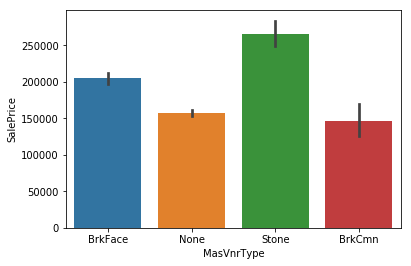

In [90]:
sns.barplot(df_train.MasVnrType,df_train.SalePrice)

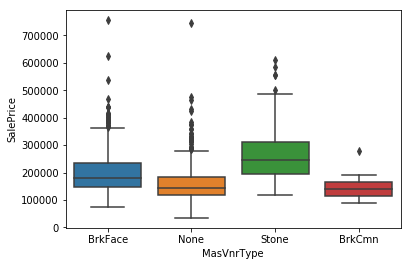

In [91]:
sns.boxplot(df_train.MasVnrType,df_train.SalePrice)#石積のベニヤタイプ

In [92]:
MasVnrT_mapping = {'Stone':2,'BrkFace':1,'None':0,'BrkCmn':0}
df_train['MasVnrType'] = df_train['MasVnrType'].map(MasVnrT_mapping
                                                   )

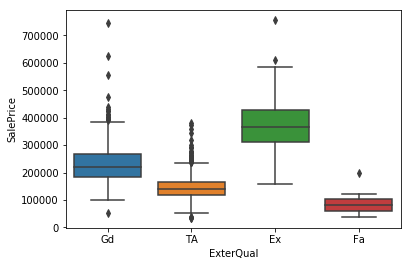

In [93]:
sns.boxplot(df_train.ExterQual,df_train.SalePrice)#外装材の品質　#Ex:3 Gd:2 TA:1 Fa:0

In [94]:
ExterQual_mapping = {'Ex':3,'Gd':2,'TA':1,'Fa':0}
df_train['ExterQual'] = df_train['ExterQual'].map(ExterQual_mapping)

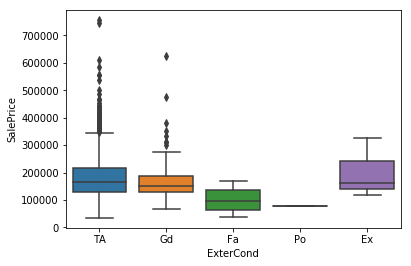

In [95]:
sns.boxplot(df_train.ExterCond,df_train.SalePrice)#外装材の材質 #Ex:4 TA:3 Gd:2 Fa:1 Po:1

In [96]:
exter_mapping = {'Ex':4, 'TA':3, 'Gd':2, 'Fa':1, 'Po':1 }

In [97]:
df_train['ExterCond'] = df_train['ExterCond'].map(exter_mapping)

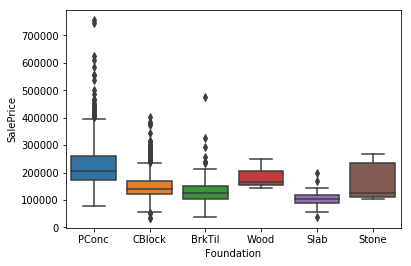

In [98]:
sns.boxplot(df_train.Foundation,df_train.SalePrice) #財団のの種類  #PConc,Stone,Wood:1/ CBlock,BrkTil,Slab:0 

In [99]:
fundation_mapping = {'PConc':1, 'Stone':1, 'Wood':1, 'CBlock':0, 'BrkTil':0, 'Slab':0 }

In [100]:
df_train['Foundation'] = df_train['Foundation'].map(fundation_mapping)

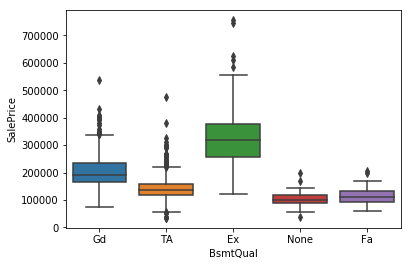

In [101]:
sns.boxplot(df_train.BsmtQual,df_train.SalePrice)#地下室の高さ # Ex:2 Gd:1 TA,None,Fa:0

In [102]:
BsmtQual_mapping = {'Ex':3, 'TA':1, 'Gd':2, 'Fa':1, 'None':0 }

In [103]:
df_train['BsmtQual'] = df_train['BsmtQual'].map(BsmtQual_mapping)

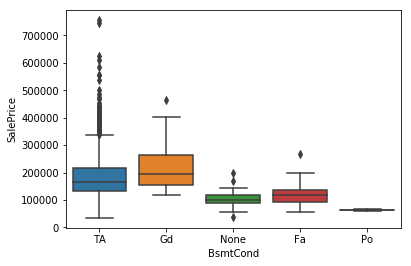

In [104]:
#BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#'SaleType', 'SaleCondition'
sns.boxplot(df_train.BsmtCond,df_train.SalePrice)#地下室の概況 #Gd:2 / TA:1 / None,Fa,Po:0

In [105]:



BsCond_mapping = {'TA':2, 'Gd':3, 'Fa':1, 'Po':0 ,'None':1 }

In [106]:



df_train['BsmtCond'] = df_train['BsmtCond'].map(BsCond_mapping)

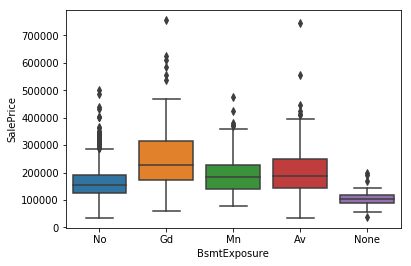

In [107]:
sns.boxplot(df_train.BsmtExposure,df_train.SalePrice)#庭とかの地下壁のレベル # Gd:2 / Mn,Av:1 / No,None:0

In [108]:
pd.Series.value_counts(df_train['BsmtExposure'])

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [109]:
BsEx_mapping = {'Mn':1, 'Av':2, 'Gd':3, 'No':0, 'None':0 }

In [110]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(BsEx_mapping)

In [111]:
pd.Series.value_counts(df_train['BsmtExposure'])

0    991
2    221
3    134
1    114
Name: BsmtExposure, dtype: int64

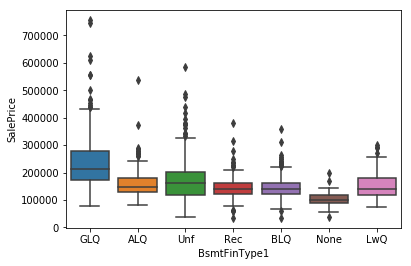

In [112]:
sns.boxplot(df_train.BsmtFinType1,df_train.SalePrice) #地下室の仕上がり # GLQ:3 / Unf,LwQ:2 / ALQ,Rec,BLQ:1 / None:0

In [113]:
pd.Series.value_counts(df_train['BsmtFinType1'])

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [114]:
BsFin1_mapping = {'GLQ':3, 'Unf':2, 'LwQ':2, 'ALQ':1, 'Rec':1, 'BLQ':1,'None':0 }

In [115]:
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map(BsFin1_mapping)

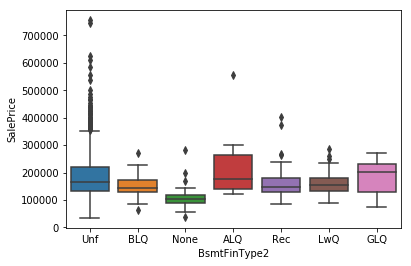

In [116]:
sns.boxplot(df_train.BsmtFinType2,df_train.SalePrice) #2番目に完成した領域の仕上がり #GLQ,ALQ:2 / Unf,Rec,LwQ:1 / None:0

In [117]:
BsFin2_mapping = {'GLQ':2, 'Unf':1, 'LwQ':1, 'ALQ':2, 'Rec':1, 'BLQ':1,'None':0 }

In [118]:
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map(BsFin2_mapping)

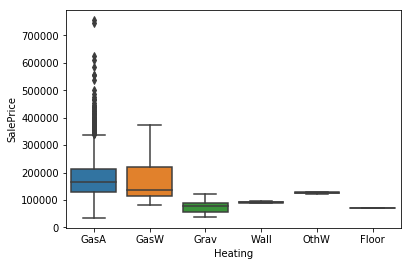

In [119]:
sns.boxplot(df_train.Heating,df_train.SalePrice) #暖房の種類 #GasA,GasW:1 / Grav,Wall,OthW,Floor:0

In [120]:
Heat_mapping = {'GasA':2, 'GasW':2, 'OthW':1, 'Grav':0, 'Wall':0, 'Floor':0}

In [121]:
df_train['Heating'] = df_train['Heating'].map(Heat_mapping)

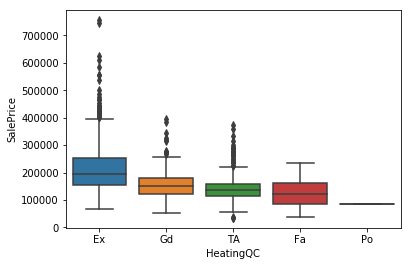

In [122]:
sns.boxplot(df_train.HeatingQC,df_train.SalePrice) #暖房の品質 # Ex:2 / Gd,TA,Fa:1/Po:0

In [123]:
HeatQC_mapping = {'Ex':2, 'Gd':1, 'TA':1, 'Fa':1, 'Po':0}
df_train['HeatingQC'] = df_train['HeatingQC'].map(HeatQC_mapping)

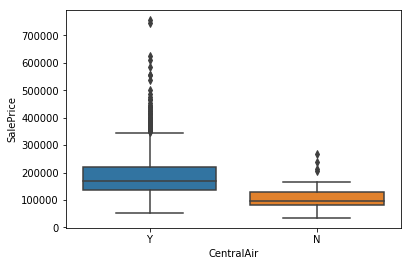

In [124]:
sns.boxplot(df_train.CentralAir,df_train.SalePrice)#セントラルエアコン # Y:1 / N:0

In [125]:
CentralAir_mapping = {'Y':1, 'N':0}
df_train['CentralAir'] = df_train['CentralAir'].map(CentralAir_mapping)

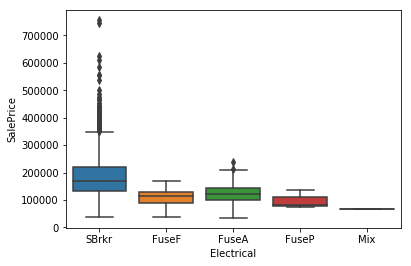

In [126]:
sns.boxplot(df_train.Electrical,df_train.SalePrice) #電気システム # SBrkr:1 / その他:0

In [127]:
Electrical_mapping = {'SBrkr':1, 'FuseF':0, 'FuseA':0, 'FuseP':0, 'Mix':0}
df_train['Electrical'] = df_train['Electrical'].map(Electrical_mapping)

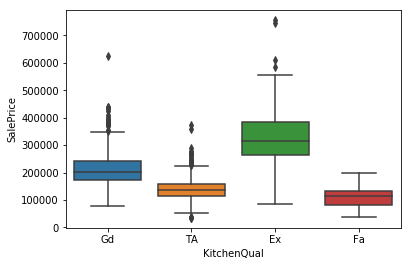

In [128]:
sns.boxplot(df_train.KitchenQual,df_train.SalePrice)#キッチンのクオリティ # Ex:2 / Gd:1 / TA,Fa:0

In [129]:
KitchenQL_mapping = {'Ex':2, 'Gd':1, 'TA':0, 'Fa':0}
df_train['KitchenQual'] = df_train['KitchenQual'].map(KitchenQL_mapping)

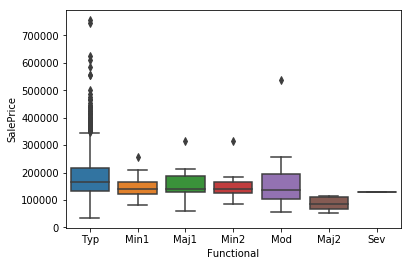

In [130]:
sns.boxplot(df_train.Functional,df_train.SalePrice) #家庭用機能性評価 # Typ,Mod,Maj1:2 / Min1,Min2,Sev:1 / Maj2:0

In [131]:
Functional_mapping = {'Typ':2, 'Mod':2, 'Maj1':2, 'Min1':1, 'Maj2':0,'Min2':1,'Sev':1}
df_train['Functional'] = df_train['Functional'].map(Functional_mapping)

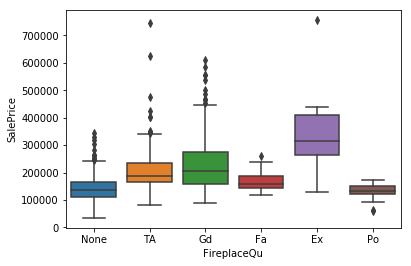

In [132]:
sns.boxplot(df_train.FireplaceQu,df_train.SalePrice) #暖炉の品質 #Ex:4 / Gd:3 / TA:2 / Fa:1 / None, Po:0

In [133]:
FireQu_mapping = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0, 'None':0}
df_train['FireplaceQu'] = df_train['FireplaceQu'].map(FireQu_mapping)

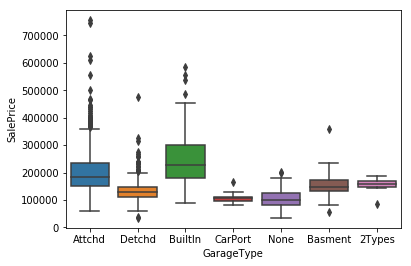

In [134]:
sns.boxplot(df_train.GarageType,df_train.SalePrice) #ガレージのタイプ # Builtln :2 / Attchd,Basment,2Types:1 / その他: 0

In [135]:
pd.Series.value_counts(df_train['GarageType'])

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [136]:
GarageType_mapping = {'BuiltIn':2, 'Attchd':1, 'Basment':1, '2Types':1, 'Detchd':0,'CarPort':0,'None':0}
df_train['GarageType'] = df_train['GarageType'].map(GarageType_mapping)

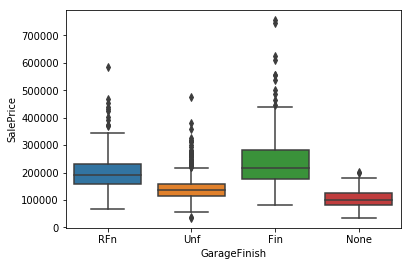

In [137]:
sns.boxplot(df_train.GarageFinish,df_train.SalePrice) #ガレージの内部仕上げ # Fin:3 / RFn:2 / Unf:1 / None:0

In [138]:
GarageFin_mapping = {'Fin':3, 'RFn':2, 'Unf':1, 'None':0}
df_train['GarageFinish'] = df_train['GarageFinish'].map(GarageFin_mapping)

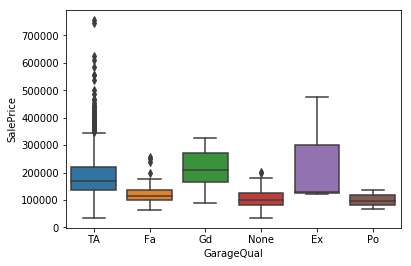

In [139]:
sns.boxplot(df_train.GarageQual,df_train.SalePrice) #ガレージクオリティ # Ex:3 Gd:2 TA:1 Fa,None,po:0

In [140]:
pd.Series.value_counts(df_train['GarageQual'])

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [141]:
GarageQL_mapping = {'Ex':3, 'Gd':2, 'TA':1, 'Fa':0, 'Po':0,'None':0}
df_train['GarageQual'] = df_train['GarageQual'].map(GarageQL_mapping)

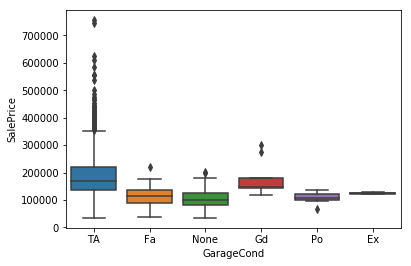

In [142]:
#'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#'SaleType', 'SaleCondition'
sns.boxplot(df_train.GarageCond,df_train.SalePrice) #ガレージのコンディション #TA:2 Gd:1 その他:0

In [143]:
GarageCond_mapping = {'Ex':0, 'Gd':1, 'TA':2, 'Fa':0, 'Po':0,'None':0}
df_train['GarageCond'] = df_train['GarageCond'].map(GarageCond_mapping)

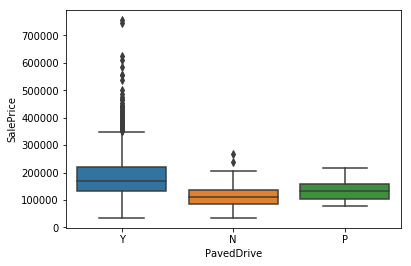

In [144]:
sns.boxplot(df_train.PavedDrive,df_train.SalePrice) #舗装された私道 Y:2 / P:1 / N:0

In [145]:
PavedDrive_mapping = {'Y':2, 'P':1, 'N':0}
df_train['PavedDrive'] = df_train['PavedDrive'].map(PavedDrive_mapping)

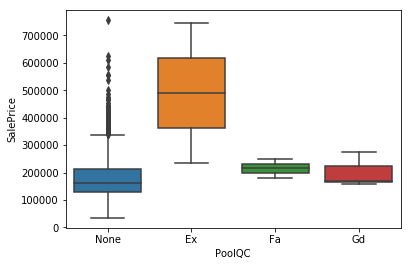

In [146]:
sns.boxplot(df_train.PoolQC,df_train.SalePrice) #プールの品質 # Ex:1 / その他: 0

In [147]:
PoolQC_mapping = {'Ex':1, 'Gd':0,'Fa':0, 'None':0}
df_train['PoolQC'] = df_train['PoolQC'].map(PoolQC_mapping)

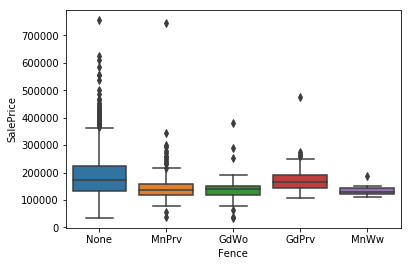

In [148]:
sns.boxplot(df_train.Fence,df_train.SalePrice) #フェンスの品質 # None, GdPrv:1 / その他:0

In [149]:
Fence_mapping = {'MnPrv':0, 'GdWo':0, 'GdPrv':1, 'MnWw':0,'None':1}
df_train['Fence'] = df_train['Fence'].map(Fence_mapping)

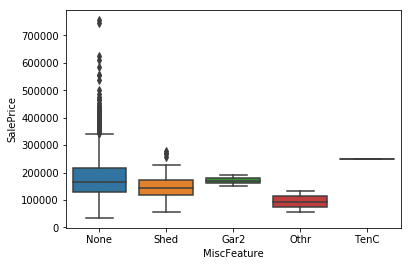

In [150]:
sns.boxplot(df_train.MiscFeature,df_train.SalePrice) #その他の機能 # None,Shed,TenC,Gar2:1 , Othr:0

In [151]:
MiscFeature_mapping = {'Shed':1, 'Gar2':1, 'TenC':1,'Othr':0,'None':1}
df_train['MiscFeature'] = df_train['MiscFeature'].map(MiscFeature_mapping)

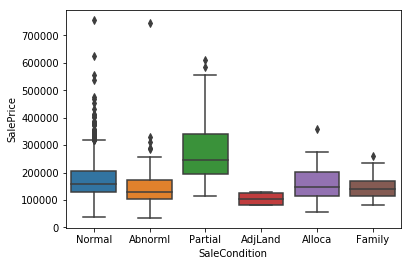

In [152]:
sns.boxplot(df_train.SaleCondition,df_train.SalePrice) #販売条件 # Partial:3 / Normal,Alloca:2 / Abnorml,Family:1 / AdjLand:0

In [153]:
SaleCon_mapping = {'Partial':3, 'Normal':2, 'Alloca':2, 'Family':1, 'Abnorml':1,'AdjLand':0}
df_train['SaleCondition'] = df_train['SaleCondition'].map(SaleCon_mapping)

In [154]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [155]:
df_train.select_dtypes(include=['object'])

,Neighborhood,SaleType
0,CollgCr,WD
1,Veenker,WD
2,CollgCr,WD
3,Crawfor,WD
4,NoRidge,WD
5,Mitchel,WD
6,Somerst,WD
7,NWAmes,WD
8,OldTown,WD
9,BrkSide,WD


In [156]:
df_num = df_train.select_dtypes(exclude=['object'])

In [157]:
df_num.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

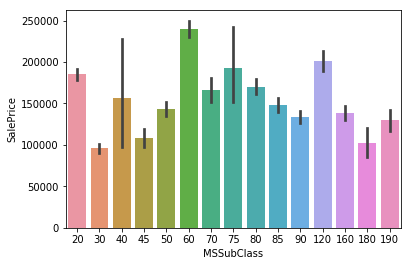

In [158]:
sns.barplot(df_train.MSSubClass,df_train.SalePrice) #建物クラス

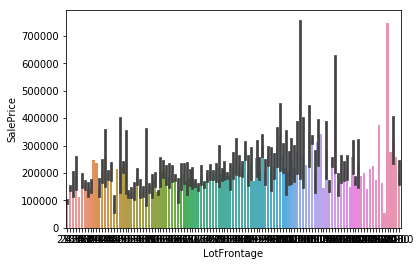

In [159]:
sns.barplot(df_train.LotFrontage,df_train.SalePrice)

In [160]:
df_train.select_dtypes(include=['object'])

,Neighborhood,SaleType
0,CollgCr,WD
1,Veenker,WD
2,CollgCr,WD
3,Crawfor,WD
4,NoRidge,WD
5,Mitchel,WD
6,Somerst,WD
7,NWAmes,WD
8,OldTown,WD
9,BrkSide,WD


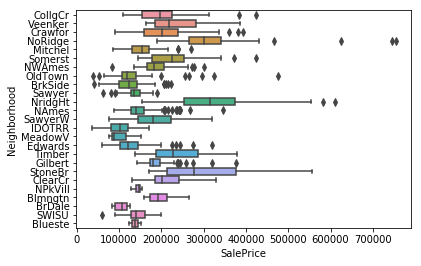

In [161]:
sns.boxplot(df_train.SalePrice,df_train.Neighborhood)

In [162]:
pd.Series.value_counts(df_train['Neighborhood'])

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [163]:
Neighbor_mapping = {'NridgHt':3, 'StoneBr':4, 'NoRidge':4, 'Veenker':3, 'Timber':3,'CollgCr':2,'Crawfor':2,'Somerst':2,'SawyerW':2, 'ClearCr':2, 'Gilbert':2, 'NWAmes':2, 'Blmngtn':2, 'Mitchel':1, 'Sawyer':1, 'NAmes':1, 'NPkVill':1,'SWISU':1,'Blueste':1,'OldTown':0,'BrkSide':0,'IDOTRR':0,'MeadowV':0,'Edwards':0,'BrDale':0}
df_train['Neighborhood'] = df_train['Neighborhood'].map(Neighbor_mapping)

In [164]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

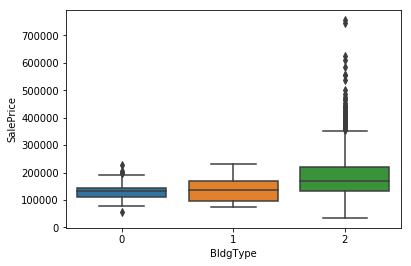

In [165]:
sns.boxplot(df_train.BldgType,df_train.SalePrice)

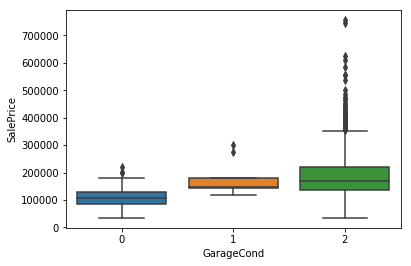

In [166]:
sns.boxplot(df_train.GarageCond,df_train.SalePrice)

In [167]:
df_train.select_dtypes(include=['object']).columns

Index(['SaleType'], dtype='object')

In [168]:
corr = df_train.corr()
corr.sort_values(["SalePrice"],ascending=False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
Neighborhood     0.692926
ExterQual        0.682639
KitchenQual      0.664068
BsmtQual         0.654451
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
FireplaceQu      0.526474
YearBuilt        0.522897
YearRemodAdd     0.507101
Foundation       0.495757
GarageType       0.483983
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.434965
MasVnrType       0.426703
BsmtFinType1     0.424901
BsmtFinSF1       0.386420
Exterior2nd      0.364732
BsmtExposure     0.361863
Exterior1st      0.360219
LotFrontage      0.349876
                   ...   
RoofMatl         0.169324
BedroomAbvGr     0.168213
PoolQC           0.144146
Alley            0.139868
ExterCond        0.137159
BsmtFinType2     0.126502
LotConfig        0.123155
Functional  

In [169]:
data_train = ['SalePrice','OverallQual','TotalSF','GrLivArea','Neighborhood','ExterQual','KitchenQual','BsmtQual','GarageCars','GarageArea']

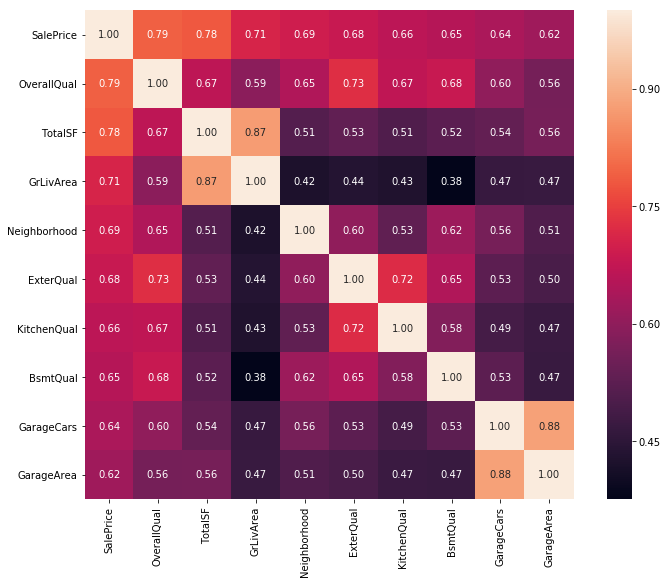

In [170]:
plt.figure(figsize=(12,9))
sns.heatmap(df_train[data_train].corr(),annot=True,square=True,fmt='.2f')
plt.show()

In [171]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.drop(df_train[(df_train['LotArea']>150000) & (df_train['SalePrice']<200000)].index)
df_train = df_train.drop(df_train[(df_train['TotalSF']>7000) & (df_train['SalePrice']<300000)].index)

In [183]:
train_ID = df_train['Id']
test_ID = df_test['Id']

y = df_train['SalePrice']
x = df_train.drop(['Id','SalePrice'],axis=1)

In [184]:
X_train = x.iloc[:df_train.shape[0],:]
X_test = x.iloc[df_train.shape[0]:,:]

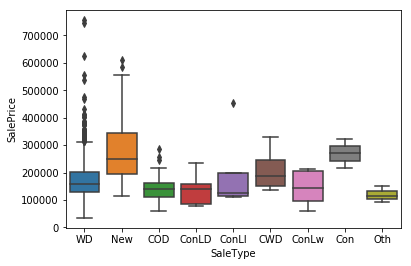

In [174]:
sns.boxplot(df_train.SaleType,df_train.SalePrice)

In [175]:
pd.Series.value_counts(df_train['SaleType'])

WD       1267
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [176]:
Sale_mapping = {'New':3, 'Con':3, 'CWD':2, 'ConLI':1, 'ConLw':1,'WD':1,'COD':0,'ConLD':0,'Oth':0}
df_train['SaleType'] = df_train['SaleType'].map(Sale_mapping)

In [177]:
df_train['SaleType']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      3
12      1
13      3
14      1
15      1
16      1
17      1
18      1
19      0
20      3
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    0
1436    1
1437    3
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    3
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: SaleType, Length: 1458, dtype: int64

In [181]:
df_train = df_train.apply(lambda x:pd.to_numeric(x),axis=0)

In [182]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
                  ...   
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
FireplaceQu        int64
GarageType         int64
GarageYrBlt      float64
GarageFinish       int64
GarageCars         int64
GarageArea         int64


Training done using Random Forest


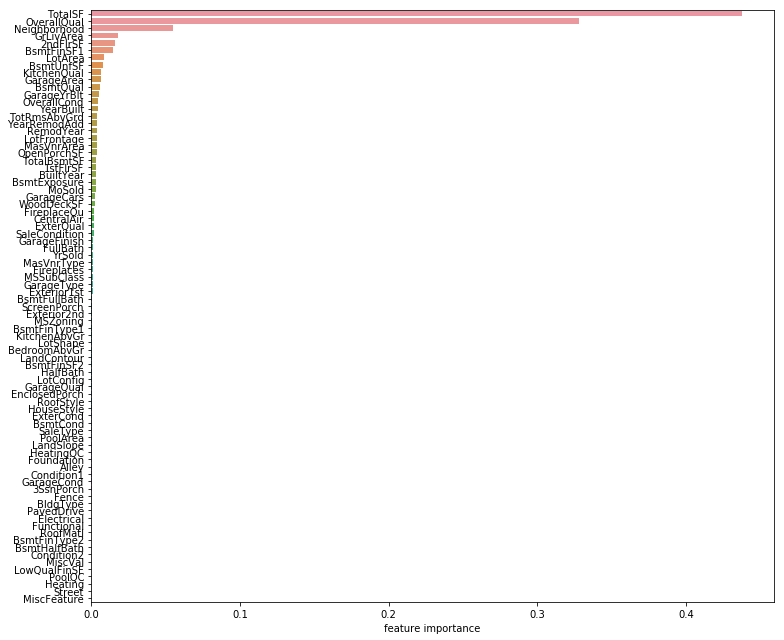

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train,y)
print("Training done using Random Forest")
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [205]:
x_train = X_train.iloc[:,ranking[:20]]
x_train.columns

Index(['TotalSF', 'OverallQual', 'Neighborhood', 'GrLivArea', '2ndFlrSF',
       'BsmtFinSF1', 'LotArea', 'BsmtUnfSF', 'KitchenQual', 'GarageArea',
       'BsmtQual', 'GarageYrBlt', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd',
       'YearRemodAdd', 'RemodYear', 'LotFrontage', 'MasVnrArea',
       'OpenPorchSF'],
      dtype='object')

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
X1_train, X1_test, y1_train, y1_test = train_test_split(x,y, test_size=0.3, random_state=1234)

In [187]:
ss = StandardScaler()
X_std = ss.fit_transform(X1_train)
X_test_std = ss.fit_transform(X1_test)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [188]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_std,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [189]:
from sklearn.model_selection import cross_val_score
#正答率の表示
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [190]:
y_test_pred15 = lr.predict(X1_test)
print("重回帰：%d"%np.sqrt(mean_squared_error(y1_test, y_test_pred15)))
scores = cross_val_score(lr,X_std,y1_train)
print('%f'%scores.mean())
r2_score(y1_test,y_test_pred15)

重回帰：1336037199046506240
0.871431


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-3.72299826644405e+26

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
lasso = Lasso()
rf = RandomForestRegressor()
en = ElasticNet()
lr = LogisticRegression(C=1.0)
lr.fit(X1_train,y1_train)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
#グリッドサーチ用パラメータの設定
lasso_parameters = {'alpha':[0.1, 0.5, 1]}
rf_parameters= {'n_estimators':[100, 500, 2000], 'max_depth':[3, 5, 10]}
en_parameters = {'alpha':[0.05,0.1,0.5], 'l1_ratio':[0.3,0.5,0.8]}
#グリッドサーチ
lasso_gs = GridSearchCV(lasso, lasso_parameters)
lasso_gs.fit(X1_train,y1_train)
rf_gs = GridSearchCV(rf, rf_parameters)
rf_gs.fit(X1_train,y1_train)
en_gs = GridSearchCV(en, en_parameters)
en_gs.fit(X1_train,y1_train)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.05, 0.1, 0.5], 'l1_ratio': [0.3, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42)

In [195]:
#ロジスティック回帰
lr = LogisticRegression(C=1.0)
lr.fit(X1_train,y1_train)
y_pred4 = lr.predict(X1_test)
print("ロジスティック回帰：%d"%mean_squared_error(y1_test, y_pred4)**(1/2))
score1 = cross_val_score(lr,X1_train,y1_train)
R1 = r2_score(y1_test,y_pred4)
print('%f'%score1.mean())
print('%f'%R1)
#Lasso回帰
y_pred = lasso_gs.predict(X1_test)
print("Lasso回帰:%d"%(mean_squared_error(y1_test, y_pred)**(1/2)))
score2 = cross_val_score(lasso_gs,X1_test,y1_test)
print('%f'%score2.mean())
R2 = r2_score(y1_test,y_pred)
print('%f'%R2)
#ランダムフォレスト
y_pred2 = rf_gs.predict(X1_test)
print("ランダムフォレスト:%d"%(mean_squared_error(y1_test, y_pred2)**(1/2)))
score3 = cross_val_score(rf_gs,X1_test,y1_test)
print('%f'%score3.mean())
R3 = r2_score(y1_test,y_pred2)
print('%f'%R3)
#ElasticNet
y_pred5 = en_gs.predict(X1_test)
print("ElasticNet:%d"%mean_squared_error(y1_test, y_pred5)**(1/2))
score4 = cross_val_score(en_gs,X1_test,y1_test)
print('%f'%score4.mean())
R4 = r2_score(y1_test,y_pred5)
print('%f'%R4)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_spli

ロジスティック回帰：53379


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

0.014585
0.405691
Lasso回帰:24904


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the def

0.834294
0.870633
ランダムフォレスト:23870


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.843844
0.881153
ElasticNet:24640


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

0.839654
0.873367


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In [196]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=500, subsample=0.8)
xgb_reg.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [197]:
y_pred3 = xgb_reg.predict(X1_test)
score5 = cross_val_score(xgb_reg,X1_test,y1_test)
print('%f'%score5.mean())
print("xgboost:%d"%np.sqrt(mean_squared_error(y1_test, y_pred3)))
R5 = r2_score(y1_test,y_pred3)
print('%f'%R5)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.837897
xgboost:22896
0.890656


In [198]:
lasso = Lasso(normalize=True, random_state=200, max_iter=10000)
lasso.fit(X1_train,y1_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=200,
   selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
y_pred4 = lasso.predict(X1_test)
print("LassoでのRMSE:",np.sqrt(mean_squared_error(y1_test, y_pred4)))
score6 = cross_val_score(lasso,X1_test,y1_test)
print('%f'%score6.mean())
R6 = r2_score(y1_test,y_pred4)
print('%f'%R6)

LassoでのRMSE: 24834.12647066678


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.835848
0.871367


In [200]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_svr = scaler.fit_transform(X1_train)
X_test_svr = scaler.transform(X1_test)
#SVR
svr = svm.SVR(C=1e6,epsilon=0.2,kernel='rbf')
svr.fit(X_train_svr, y1_train)
#RMSE
y_pred = svr.predict(X_test_svr)
print("SVRでのRMSE:%d"%np.sqrt(mean_squared_error(y1_test, y_pred)))
score7 = cross_val_score(svr,X1_test,y1_test)
print('%f'%score7.mean())
R7 = r2_score(y1_test,y_pred)
print('%f'%R7)

C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVRでのRMSE:20716
-0.009076
0.910485


C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Arisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

In [201]:
#XGBoost, RandomForest, SVR
y_stack = y_pred*(11/24) + y_pred2*(1/12)+y_pred3*(11/24)
print("Stacking1:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))
R10 = r2_score(y1_test,y_stack)
print('%f'%R10)

Stacking1:20127
0.915505


In [202]:
y_stack = y_pred*(1/2) + y_pred3*(1/2)
print("Stacking:%d"%np.sqrt(mean_squared_error(y1_test, y_stack)))
R12 = r2_score(y1_test,y_stack)
print('%f'%R12)

Stacking:20099
0.915736
